In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

Get the data

In [4]:
data = loadmat('D:/ProgrammingBook/AndrewNg/ex7data2.mat')
df = pd.DataFrame(data['X'], columns = ['x1', 'x2'])
df.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


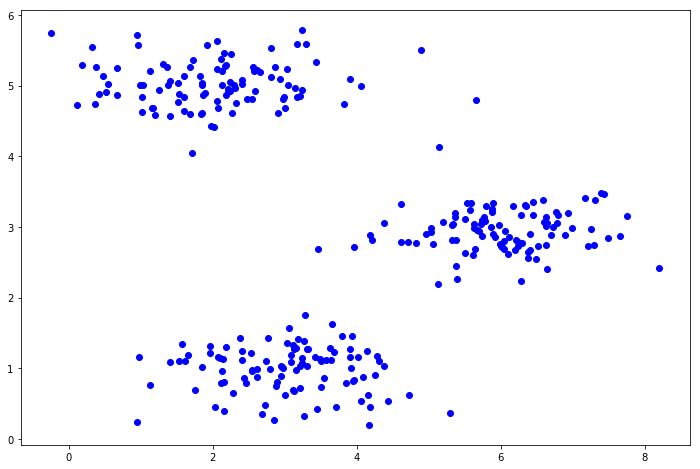

In [7]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(df['x1'], df['x2'], c = 'b')
plt.show()

In [30]:
def get_min_dist(X, centroid):
    n = centroid.shape[0]
    m = X.shape[0]
    dist = np.zeros((m,n))
    for i in range(n):
        temp = X - centroid[i,:]
        dist[:,i] = temp[:,0]**2+temp[:,1]**2
    return dist

In [38]:
def find_closest(X, centroid):
    dist = get_min_dist(X, centroid)
    idx = np.argmin(dist, axis = 1)
    return idx

In [33]:
x = df.values
x.shape

(300, 2)

In [34]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids.shape

(3, 2)

In [39]:
idx = find_closest(x,initial_centroids)
idx[0:3]

array([0, 2, 1], dtype=int64)

In [52]:
idx.shape, np.unique(idx).shape[0]

((300,), 3)

In [64]:
def compute_centroid(x,idx):
    m = np.unique(idx).shape[0]
    new_centroid = np.zeros((m,2))
    for i in range(m):
        index = np.where(idx==i)
        new_centroid[i,:] = np.sum(x[index[0]],axis = 0)/len(index[0])
    return new_centroid

In [65]:
compute_centroid(x, idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [66]:
def kmeans(x, initial_centroids, max_iter):
    centroid = initial_centroids
    k = centroid.shape[0]
    for i in range(max_iter):
        idx = find_closest(x, centroid)
        centroid = compute_centroid(x, idx)
    return k, idx, centroid

In [67]:
K,IDX,CENTROID = kmeans(x, initial_centroids, 10)

In [68]:
K, IDX, CENTROID

(3, array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [76]:
cluster1 = x[np.where(IDX==0)]
cluster2 = x[np.where(IDX==1)]
cluster3 = x[np.where(IDX==2)]
cluster1.shape, cluster2.shape, cluster3.shape

((98, 2), (102, 2), (100, 2))

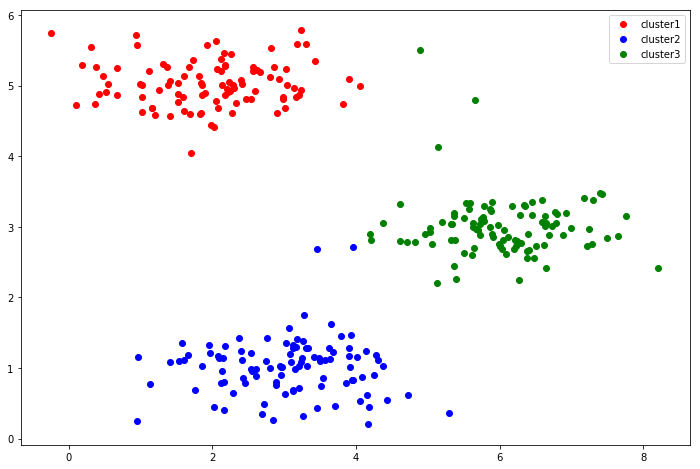

In [77]:
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], c = 'r', label = 'cluster1')
ax.scatter(cluster2[:,0], cluster2[:,1], c = 'b', label = 'cluster2')
ax.scatter(cluster3[:,0], cluster3[:,1], c = 'g', label = 'cluster3')
plt.legend(loc=1)
plt.show()

在使用Kmeans的过程中，聚类中心的初始值也是非常重要的。不同的初始值可能导致结果的大相径庭。所以通常是取多次初始值，然后计算每次迭代结束后的结果。取最好的那一个聚类中心。下面是初始化函数，通常从已有样本中选择K个初始中心。

In [81]:
def initial(x, k):
    m,n = x.shape
    idx = np.random.randint(0,m,k)
    centroid = np.zeros((k,n))
    for i in range(k):
        centroid[i,:] = x[idx[i]]
    return centroid
initial(x,3)

array([[7.65503226, 2.87095628],
       [2.37198785, 1.42789607],
       [3.00677254, 0.62519128]])

Principal Component Analysis

In [82]:
data1 = loadmat('D:/ProgrammingBook/AndrewNg/ex7data1.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [85]:
df1 = pd.DataFrame(data1['X'], columns = ['x1', 'x2'])
df1.head()

,x1,x2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


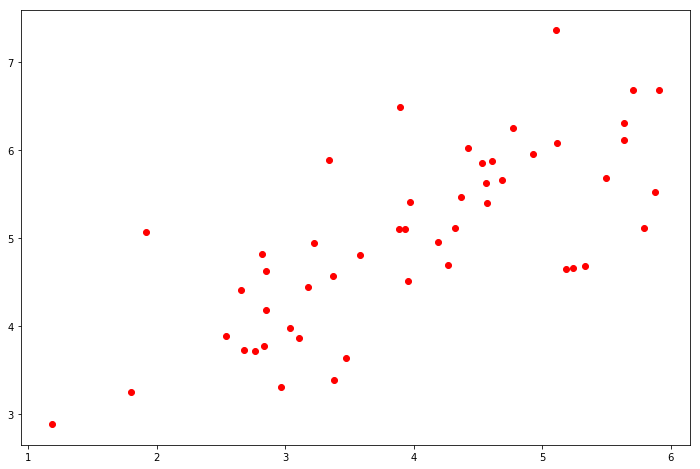

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df1['x1'],df1['x2'],c='r')
plt.show()

In [88]:
def pca(x):
    #normalization
    x = (x-x.mean())/x.std()
    #convariance matrix
    x = np.matrix(x)
    cov = (x.T*x)/x.shape[0]#矩阵点乘
    #perform SVD
    U,S,V = np.linalg.svd(cov)
    return U,S,V

In [90]:
x = df1.values
x.shape

(50, 2)

In [91]:
U,S,V = pca(x)

In [92]:
def compressed_projection(x,U,k):
    U_reduced = U[:,:k]
    return np.dot(x, U_reduced)

In [93]:
Z = compressed_projection(x,U,1)

In [94]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [97]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

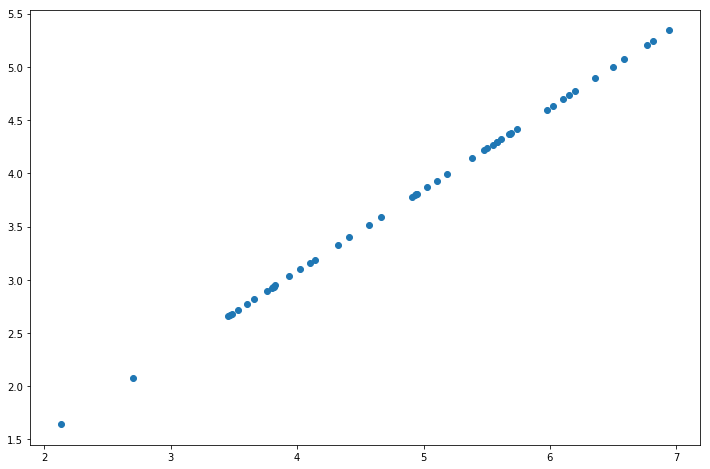

In [98]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()